In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [11]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [14]:
print(x_train.shape[1:])

(8,)


In [26]:
#这部分在搭建deep模型
# 函数式API 功能API,和之前不一样
input = keras.layers.Input(shape=x_train.shape[1:])
print(input)
#input作为输入
hidden1 = keras.layers.Dense(30, activation='relu')(input)
#hidden1作为输入
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数: f(x) = h(g(x))

#假设wide模型和deep模型的输入是一样的，wide是input，deep是hidden2对吗？
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

#然后定义model，放入input，output
model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Tensor("input_3:0", shape=(None, 8), dtype=float32)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                        

In [16]:
model.layers

In [22]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 10,
                    callbacks = callbacks)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4993 - val_loss: 0.5277
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4907 - val_loss: 0.5185
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4831 - val_loss: 0.5154
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4772 - val_loss: 0.5046
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4711 - val_loss: 0.4978
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4657 - val_loss: 0.4914
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4605 - val_loss: 0.4855
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4556 - val_loss: 0.4795
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4515 - val_loss: 0.4761
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4468 - val_loss: 0.4707

In [23]:
print(history.history)

{'loss': [0.499254047870636, 0.4906787872314453, 0.48313361406326294, 0.47715166211128235, 0.4710512161254883, 0.465736985206604, 0.46049633622169495, 0.45559829473495483, 0.4515358805656433, 0.44675493240356445], 'val_loss': [0.5277131199836731, 0.518538236618042, 0.5153658986091614, 0.504610538482666, 0.4977777898311615, 0.49144917726516724, 0.4854651689529419, 0.4795462191104889, 0.47608399391174316, 0.4707059860229492]}


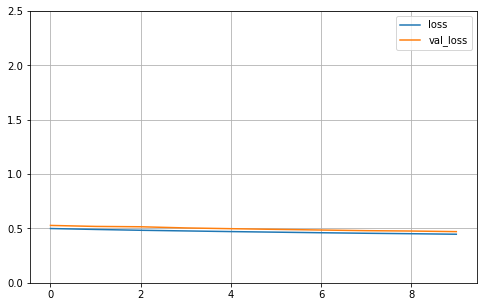

In [24]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()
plot_learning_curves(history)

In [25]:
#不是这个模型不好，而是搭建的比较简单
model.evaluate(x_test_scaled, y_test, verbose=0)

0.46673694252967834